In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
 
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [3]:
cities_data_df = pd.DataFrame(cities)
cities_data_df.columns = ['City']
cities_data_df.head()

,City
0,rikitea
1,jamestown
2,gorom-gorom
3,nikolskoye
4,airai


## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [5]:
column_names = ["City","Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns=column_names)
cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)


In [6]:
row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_data_df.iterrows():
    target_city = row["City"]
    target_url = url + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
         
        cities_df.at[index, "City"]= city_data["name"]
        cities_df.at[index, "Country"] = city_data["sys"]["country"]
        cities_df.at[index, "Temperature (F)"] = city_data["main"]["temp"]
        cities_df.at[index, "Latitude"] = city_data["coord"]["lat"]
        cities_df.at[index, "Longitude"] = city_data["coord"]["lon"]
        cities_df.at[index, "Humidity (%)"] = city_data["main"]["humidity"]
        cities_df.at[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        cities_df.at[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
        
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1


Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=rikitea
------------------------
Proceesing: City #  2  |  Jamestown AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=jamestown
------------------------
Proceesing: City #  3  |  Gorom-Gorom BF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=gorom-gorom
------------------------
Proceesing: City #  4  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=nikolskoye
------------------------
Proceesing: City #  5  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=airai
City not found, skipping...
------------------------
Proceesing: City #  6  |  Lethem GY
http://

------------------------
Proceesing: City #  48  |  Itigi TZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=itigi
------------------------
Proceesing: City #  49  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=cidreira
------------------------
Proceesing: City #  50  |  Iquique CL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=iquique
------------------------
Proceesing: City #  51  |  Barrow AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=barrow
------------------------
Proceesing: City #  52  |  Esperance TT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=esperance
------------------------
Proceesing: City #  53  |  Haines Junction CA
http://api.openweathermap.org/data/2.5/weather?units=Imperi

------------------------
Proceesing: City #  95  |  Margate AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=margate
------------------------
Proceesing: City #  96  |  Mackenzie CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=mackenzie
------------------------
Proceesing: City #  97  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=pevek
City not found, skipping...
------------------------
Proceesing: City #  98  |  Samarai PG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=samarai
------------------------
Proceesing: City #  99  |  Quatre Cocos MU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=quatre+cocos
------------------------
Proceesing: City #  100  |  Garden City US
http://api.openweatherma

------------------------
Proceesing: City #  141  |  Chifeng CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=chifeng
------------------------
Proceesing: City #  142  |  Lebu ET
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=lebu
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  143  |  Hofn IS
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=hofn
------------------------
Proceesing: City #  144  |  Labuhan ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=labuhan
------------------------
Proceesing: City #  145  |  Camopi GF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=camopi
------------------------
Proceesing: City #  146  |  Bathsheba BB
http://api.openwe

Proceesing: City #  186  |  Sibolga ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=sibolga
------------------------
Proceesing: City #  187  |  Nanchang CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=nanchang
------------------------
Proceesing: City #  188  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=hualmay
------------------------
Proceesing: City #  189  |  Sao Filipe CV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=sao+filipe
------------------------
Proceesing: City #  190  |  Charters Towers AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=charters+towers
------------------------
Proceesing: City #  191  |  Asind IN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

------------------------
Proceesing: City #  232  |  Shevchenkove UA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=shevchenkove
------------------------
Proceesing: City #  233  |  Nelson Bay AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=nelson+bay
------------------------
Proceesing: City #  234  |  Durango US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=durango
------------------------
Proceesing: City #  235  |  Belmonte PT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=belmonte
------------------------
Proceesing: City #  236  |  Dicabisagan PH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=dicabisagan
------------------------
Proceesing: City #  237  |  Severodvinsk RU
http://api.openweathermap.org/

------------------------
Proceesing: City #  277  |  Bela PK
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=bela
------------------------
Proceesing: City #  278  |  Songjianghe CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=songjianghe
------------------------
Proceesing: City #  279  |  High Rock BS
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=high+rock
------------------------
Proceesing: City #  280  |  Constitucion MX
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=constitucion
------------------------
Proceesing: City #  281  |  Sandwick GB
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=sandwick
------------------------
Proceesing: City #  282  |  Te Anau NZ
http://api.openweathermap.org/data/2.5/weat

------------------------
Proceesing: City #  324  |  Thunder Bay CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=thunder+bay
------------------------
Proceesing: City #  325  |  Ushtobe KZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=ushtobe
------------------------
Proceesing: City #  326  |  Gorshechnoye RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=gorshechnoye
------------------------
Proceesing: City #  327  |  Dickinson US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=dickinson
------------------------
Proceesing: City #  328  |  Bembereke BJ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=bembereke
------------------------
Proceesing: City #  329  |  Tura IN
http://api.openweathermap.org/data/2.5

------------------------
Proceesing: City #  369  |  Bure NG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=bure
------------------------
Proceesing: City #  370  |  Sikonge TZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=sikonge
------------------------
Proceesing: City #  371  |  Goundam ML
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=goundam
------------------------
Proceesing: City #  372  |  Komsomolskiy RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=komsomolskiy
------------------------
Proceesing: City #  373  |  Natal BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=natal
------------------------
Proceesing: City #  374  |  Tabou CI
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

------------------------
Proceesing: City #  415  |  Meadow Lake CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=meadow+lake
------------------------
Proceesing: City #  416  |  Bahia Blanca AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=bahia+blanca
------------------------
Proceesing: City #  417  |  Cap-aux-Meules CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=cap-aux-meules
------------------------
Proceesing: City #  418  |  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=cherskiy
------------------------
Proceesing: City #  419  |  Ixtapa MX
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=ixtapa
------------------------
Proceesing: City #  420  |  Hanko FI
http://api.openweathermap.org/d

------------------------
Proceesing: City #  461  |  Arona IT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=arona
City not found, skipping...
------------------------
Proceesing: City #  462  |  Thinadhoo MV
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=thinadhoo
------------------------
Proceesing: City #  463  |  Syracuse US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=syracuse
City not found, skipping...
------------------------
Proceesing: City #  464  |  Buraydah SA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=buraydah
------------------------
Proceesing: City #  465  |  Oksfjord NO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=oksfjord
------------------------
Proceesing: City #  466  |  Avera US
h

------------------------
Proceesing: City #  507  |  Wanaka NZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=wanaka
------------------------
Proceesing: City #  508  |  Boundiali CI
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=boundiali
------------------------
Proceesing: City #  509  |  Cobija BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=cobija
------------------------
Proceesing: City #  510  |  Sivaki RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=sivaki
------------------------
Proceesing: City #  511  |  Kalemie CD
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=caa5dbaa42b2fbc4b9849709b51f0c72&q=kalemie
------------------------
Proceesing: City #  512  |  Kamra PK
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

In [7]:
cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rikitea,PF,70.55,-23.12,-134.97,100,88,12.66
1,Jamestown,AU,77.48,-33.21,138.6,31,76,14.67
2,Gorom-Gorom,BF,72.98,14.45,-0.24,86,8,3.04
3,Nikolskoye,RU,44.6,59.7,30.79,81,0,11.18
4,Airai,TL,75.32,-8.93,125.41,70,44,1.92


In [8]:
cities_df.to_csv(output_data_file)

## Latitude vs. Temperature

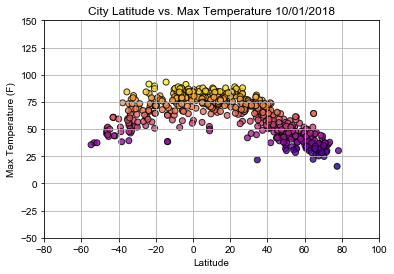

In [10]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], c=cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])


plt.savefig("output_analysis/Latitude_Temperature.png")

plt.show()

## Latitude vs. Humidity (%)

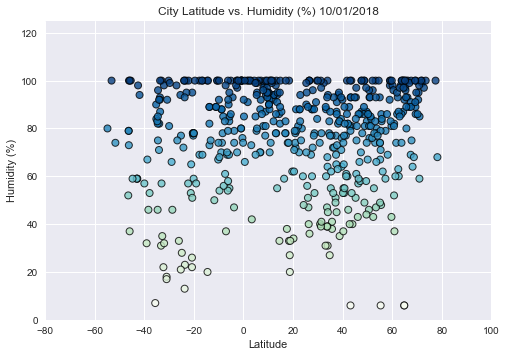

In [11]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], c=cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 125])

plt.savefig("output_analysis/Latitude_Humidity.png")

plt.show()

## Latitude vs. Cloudiness (%)

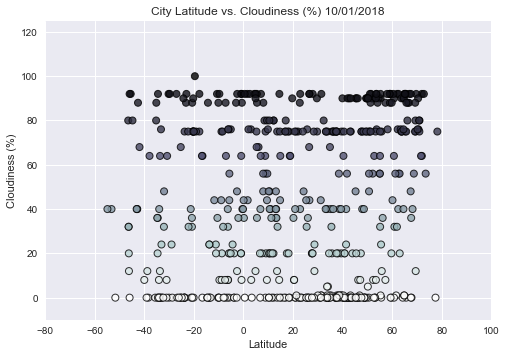

In [12]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], c=cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

plt.savefig("output_analysis/Latitude_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed (%)

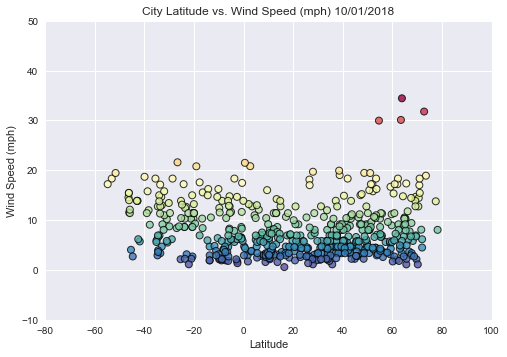

In [13]:

plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])


plt.savefig("output_analysis/Latitude_Wind_Speed.png")

plt.show()